## 最大クリーク問題

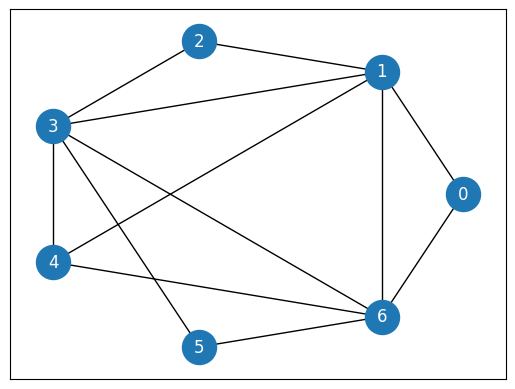

In [1]:
import networkx as nx
    
N = 7  # グラフの頂点数
G = nx.Graph()
G.add_nodes_from(range(N))
# 2つの頂点をつなぐ辺を定義
edge_list = [
    (0, 1),
    (0, 6),
    (1, 2),
    (1, 3),
    (1, 4),
    (1, 6),
    (2, 3),
    (3, 4),
    (3, 5),
    (3, 6),
    (4, 6),
    (5, 6),
]
G.add_edges_from(edge_list)
    
pos = nx.circular_layout(G)
    
nx.draw_networkx(G, node_size=600, font_color="w", pos=pos)

## 定式化
### 決定変数
$q_i \in \{ 0, 1 \} \, (i=0,\ldots,N-1)$ ：頂点 $i$ がクリークに含まれていたら$1$、そうでなければ$0$。

### 制約関数
「クリークに含まれている各頂点はすべて辺でむすばれている」$\leftrightarrow$ 「頂点$u$、$v$が辺で結ばれていないとき、$u$と$v$の少なくともどちらかはクリークに含まれない」
$$
    q_u q_v = 0 \;\; \text{for} \;\; (u,v) \notin E
$$

### 目的関数
クリークのサイズができるだけ大きければよい。
$$
    - \sum_{i=0}^{N-1} q_i
$$

In [2]:
# 決定変数
from amplify import VariableGenerator
    
gen = VariableGenerator()
q = gen.array("Binary", N)

# 制約関数
from amplify import equal_to, sum as amplify_sum
    
constraints = amplify_sum(equal_to(q[u] * q[v], 0) for u, v in nx.non_edges(G))

# コスト関数
cost = -q.sum()

# モデル
model = cost + constraints

In [3]:
from amplify import FixstarsClient, solve
from datetime import timedelta
    
client = FixstarsClient()
client.token = "AE/ar62PjutSqmuoEa8bvfyrEmjE1rCpOqE"
client.parameters.timeout = timedelta(milliseconds=1000)  # タイムアウトは 1000 ms
    
# 求解を実行
result = solve(model, client)
    
if len(result) == 0:
    print("解が見つかりませんでした")
else:
    print("解が見つかりました")

解が見つかりました


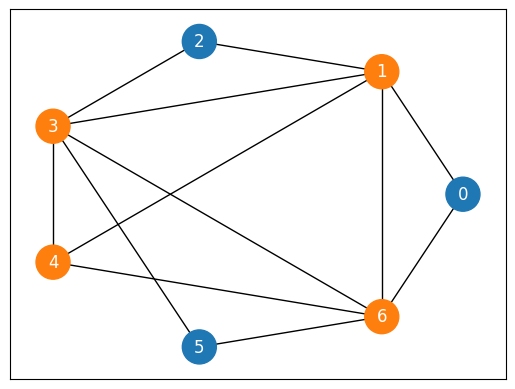

In [4]:
values = q.evaluate(result.best.values)
colors = ["C1" if value == 1 else "C0" for value in values]
nx.draw_networkx(G, node_size=600, node_color=colors, font_color="w", pos=pos)